## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
첫 번째 프로젝트에서는 우리가 오늘 많은 시간을 들여서 직접 실습해 보았던 모델 설계, 손실함수 정의와 기울기 계산을 구현해 보겠습니다.

새로운 데이터로 프로젝트를 진행하지만, 과정은 모두 동일합니다. 함께 진행했던 과정과 코드를 참고하여 충분히 고민한 후 진행해 보세요.

데이터는 sklearn.datasets에 있는 데이터 중 하나인 당뇨병 데이터를 사용하겠습니다.

데이터에 관한 정보를 다음 글에서 살펴보세요. 데이터에 대한 이해는 언제나 첫 번째로 해야하는 필수 과정입니다!



In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data # X 값
df_y = data.target #정답지

### 모델에 입력할 X, y 값

In [2]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [3]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


### train 데이터와 test 데이터로 분리

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


### 모델 

In [6]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [7]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### 손실함수 Loss

In [8]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [9]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### 기울기를 구하는 gradient 함수 구현하기

In [10]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

### 하이퍼 파라미터인 학습률

In [25]:
LEARNING_RATE = 1 #  0.001너무작어서 올렸음...

### 모델 학습하기

In [26]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 2880.9106
Iteration 200 : Loss 2880.8076
Iteration 300 : Loss 2880.7055
Iteration 400 : Loss 2880.6042
Iteration 500 : Loss 2880.5038
Iteration 600 : Loss 2880.4041
Iteration 700 : Loss 2880.3054
Iteration 800 : Loss 2880.2074
Iteration 900 : Loss 2880.1103
Iteration 1000 : Loss 2880.0140
155 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [27]:
### test 데이터에 대한 성능 확인

In [28]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2887.2178205588166)

### 정답 데이터와 예측한 데이터 시각화

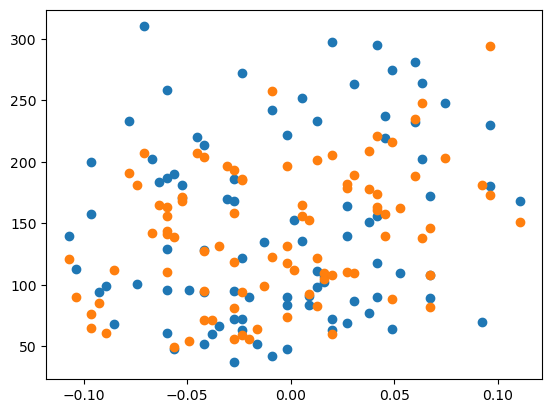

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
자.. 드디어 오늘의 마지막 프로젝트입니다! 오늘 노드의 제목이기도 한 프로젝트네요!

마지막 프로젝트로는 보다 실용적인 데이터셋을 활용할 예정입니다. 바로 그 유명한 캐글(Kaggle) 경진대회에서 제공하는 데이터셋인데요!

데이터셋의 주제는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제입니다.

자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.

이번 프로젝트에서는 직접 손실함수와 기울기를 계산하지 않고, 사이킷런(sklearn)의 LinearRegression 모델을 활용할 것입니다.

이 또한 위에서 진행해봤던 순서 그대로 진행하시면 됩니다!

단계는 다음과 같이 정리가 되어 있습니다. 그러면 오늘의 마지막 프로젝트, 시작해 볼까요!!! 

In [91]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [92]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second


train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


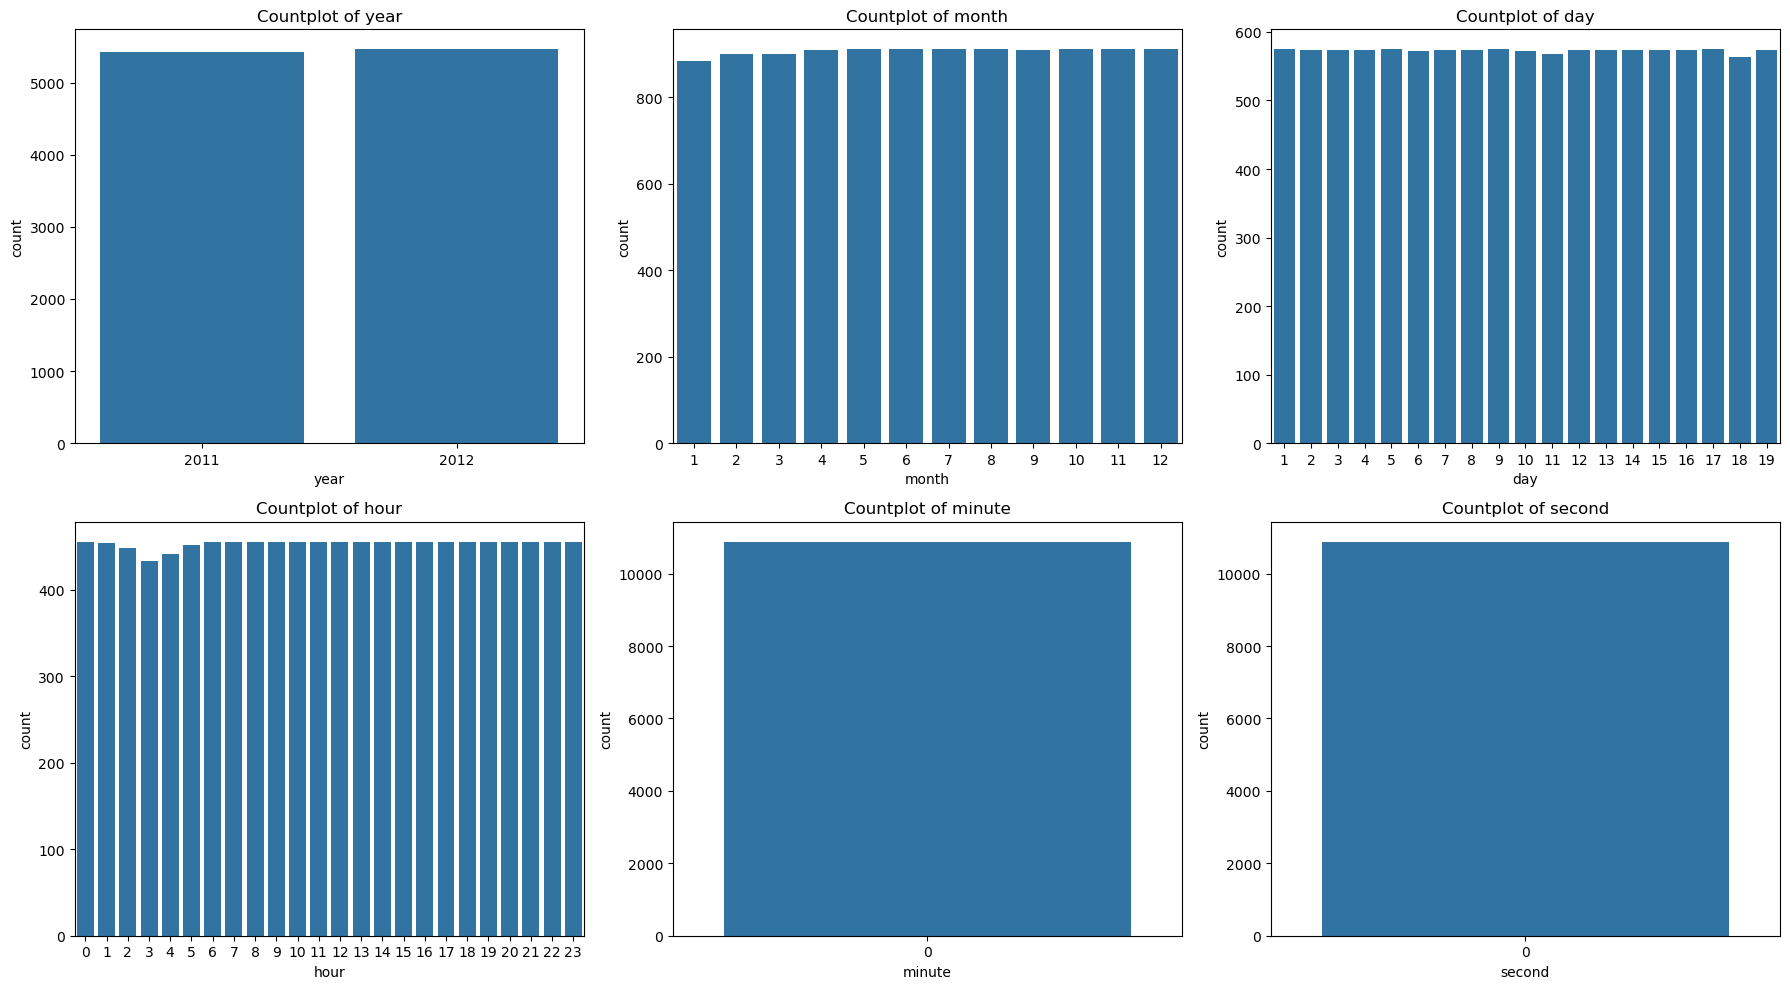

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

cols = ['year', 'month', 'day', 'hour', 'minute', 'second']

for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

#### 범주형으로 변환

범주형으로 변환 : season, weather

In [94]:
train['season'] = train['season'].astype(str)
train['weather'] = train['weather'].astype(str)
train = pd.get_dummies(train, columns=['season', 'weather'])

In [100]:
train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,minute,second,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,True,False,False,False,True,False,False,False
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,True,False,False,False,True,False,False,False
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,True,False,False,False,True,False,False,False
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,True,False,False,False,True,False,False,False
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,True,False,False,False,True,False,False,False


In [101]:
features = [
     'year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed',
     'season_1', 'season_2', 'season_3', 'season_4',
     'weather_1', 'weather_2', 'weather_3', 'weather_4'
]

X = train[features]
y = train['count']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [97]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [98]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 19783.30144508229
RMSE: 140.653124547883


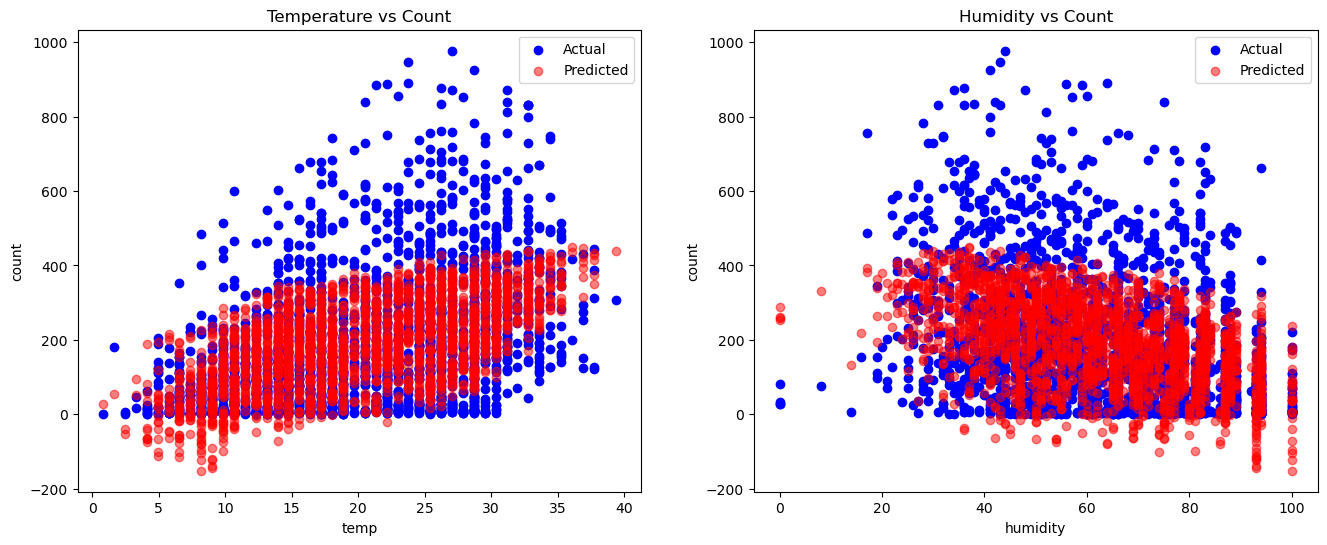

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()